In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alexk\Instacart Basket Analysis'

In [3]:
#1 Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

In [4]:
df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,Number_of_dependants,fam_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_day', 'busiest_days', 'busy_time', 'max_order', 'loyalty_flag',
       'Average_spending', 'spending_flag', 'Median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'Number_of_dependants', 'fam_status', 'income'],
      dtype='object')

In [6]:
#2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
df.drop(columns = ['First Name','Surname'])

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,spending_flag,Median_days_since_prior_order,frequency_flag,Gender,STATE,Age,date_joined,Number_of_dependants,fam_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,3360493,1320836,202557,prior,17,2,15,1.0,43553,2,...,Low spender,8.0,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404855,3360494,31526,202557,prior,18,5,11,3.0,43553,2,...,Low spender,8.0,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404856,3376038,758936,203436,prior,1,2,7,NaN,42338,4,...,Low spender,15.0,Regular customer,Male,Washington,52,3/31/2018,2,married,116193
32404857,3376039,2745165,203436,prior,2,3,5,15.0,42338,16,...,Low spender,15.0,Regular customer,Male,Washington,52,3/31/2018,2,married,116193


I've removed the First Name and Surname colums as they contain PII data

In [7]:
#3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [8]:
region = []

for value in df ["STATE"]:
    if (value == "Maine" or value=="New Hampshire" or value=="Vermont" or value=="Massachusetts" or value=="Rhode Island" or value=="Connecticut" or value=="New York" or value=="Pennsylvania" or value=="New Jersey"):
        region.append("Northeast")
    elif (value == "Wisconsin" or value=="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        region.append("Midwest")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        region.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        region.append("West")

In [9]:
df['Region'] = region

In [10]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Northeast',
 'South',
 'South',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 '

In [11]:
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


In [13]:
#4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
df.loc[df['order_number'] <5,'Activity'] = 'Low_Activity'

In [15]:
df.loc[df['order_number'] >=5,'Activity'] = 'High_Activity'

In [16]:
df ['Activity'].value_counts(dropna=False)

High_Activity    24414877
Low_Activity      7989982
Name: Activity, dtype: int64

In [17]:
low_activity = df[df.Activity == 'Low_Activity']

In [18]:
low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'low_activity.pkl'))

In [19]:
df = df[df.Activity == 'High_Activity']

In [20]:
df ['Activity'].value_counts(dropna=False)

High_Activity    24414877
Name: Activity, dtype: int64

In [21]:
#5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants.

In [22]:
df ['Parent Status']=""

In [23]:
df.loc[((df['Age'] >= 18) & (df['Age'] <= 40) & (df['Number_of_dependants'] >= 1)), 'Parent Status'] = 'Younger Parent'

In [24]:
df.loc[(df ['Number_of_dependants'] == 0), 'Parent Status'] = 'Single Adult'

In [25]:
df.loc[(df['Age'] >= 41) & (df['Number_of_dependants'] >= 1), 'Parent Status'] = 'Older Parent'

In [26]:
df['Parent Status'].value_counts(dropna= False)

Older Parent      11696127
Younger Parent     6613748
Single Adult       6105002
Name: Parent Status, dtype: int64

In [27]:
df ['Income Level']=""

In [28]:
df.loc[(df['income'] <= 40000), 'Income Level'] = 'Low Income'

In [29]:
df.loc[(df['income'] > 40000) & (df['income'] <= 100000), 'Income Level'] = 'Middle Income'

In [30]:
df.loc[(df['income'] > 100000), 'Income Level'] = 'Higher Income'

In [31]:
df['Income Level'].value_counts(dropna= False)

Middle Income    11949316
Higher Income    11225709
Low Income        1239852
Name: Income Level, dtype: int64

In [32]:
# 6 Create an appropriate visualization to show the distribution of profiles.

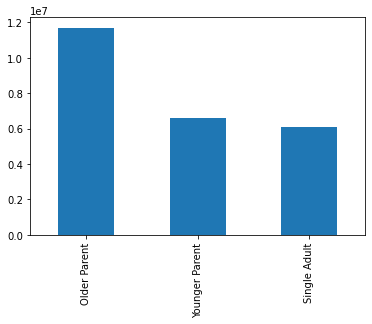

In [33]:
parent_status = df['Parent Status'].value_counts().plot.bar()

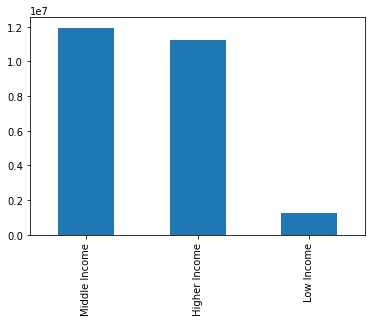

In [34]:
income_level = df['Income Level'].value_counts().plot.bar()

In [35]:
#8 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [36]:
df.groupby('Parent Status','order_number' == '1').agg({'income': ['mean']})

,income
,mean
Parent Status,
Older Parent,116158.931769
Single Adult,100179.559824
Younger Parent,70870.454009


In [53]:
df.groupby('Parent Status').agg({'income': ['mean']})

,income
,mean
Parent Status,
Older Parent,116158.931769
Single Adult,100179.559824
Younger Parent,70870.454009


In [55]:
df.groupby('Parent Status','order_number' == '1').head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,STATE,Age,date_joined,Number_of_dependants,fam_status,income,Region,Activity,Parent Status,Income Level
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
5,5,3367565,1,prior,6,2,7,19.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
6,6,550135,1,prior,7,1,9,20.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
7,7,3108588,1,prior,8,1,14,14.0,196,2,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
8,8,2295261,1,prior,9,1,16,0.0,196,4,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
10,144,2968173,15,prior,15,1,9,7.0,196,2,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,Single Adult,Middle Income
11,146,1870022,15,prior,17,2,16,8.0,196,6,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,Single Adult,Middle Income
12,147,1911383,15,prior,18,2,11,7.0,196,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,Single Adult,Middle Income
13,150,2715276,15,prior,21,1,9,7.0,196,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,Single Adult,Middle Income
14,151,487368,15,prior,22,1,10,14.0,196,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,Single Adult,Middle Income


In [37]:
df.groupby('Parent Status').agg({'income': ['max']})

,income
,max
Parent Status,
Older Parent,593901
Single Adult,584097
Younger Parent,397929


In [38]:
df.groupby('Parent Status').agg({'income': ['min']})

,income
,min
Parent Status,
Older Parent,29001
Single Adult,25903
Younger Parent,25911


In [39]:
#8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [40]:
df.groupby('Region').agg({'income': ['mean']})

,income
,mean
Region,
Midwest,100699.165784
Northeast,99926.149200
South,99410.405769
West,99769.241780


In [41]:
df.groupby(['Region','Parent Status']).agg({'Parent Status': ['count']})

Parent Status
                                 count
Region    Parent Status               
Midwest   Older Parent         2744172
          Single Adult         1436961
          Younger Parent       1530623
Northeast Older Parent         2089554
          Single Adult         1065138
          Younger Parent       1160579
South     Older Parent         3854266
          Single Adult         2038334
          Younger Parent       2236486
West      Older Parent         3008135
          Single Adult         1564569
          Younger Parent       1686060

In [42]:
df.groupby(['Region','Parent Status']).agg({'income': ['mean']})

income
                                   mean
Region    Parent Status                
Midwest   Older Parent    117595.341633
          Single Adult    100904.258966
          Younger Parent   70214.373920
Northeast Older Parent    115961.061542
          Single Adult    100004.160100
          Younger Parent   70984.640179
South     Older Parent    115524.910272
          Single Adult     99879.576923
          Younger Parent   71211.743076
West      Older Parent    115798.373579
          Single Adult    100024.198093
          Younger Parent   70934.746492

Midwest is the region with the highest average income, because it has the hightest proportion of older parents, who are the highest earning group.

In [43]:
#9 Produce suitable charts to illustrate your results and export them in your project folder.

<AxesSubplot:xlabel='Region'>

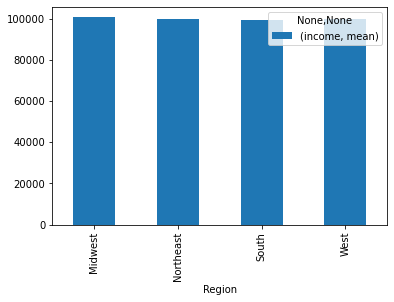

In [44]:
df.groupby('Region').agg({'income': ['mean']}).plot.bar()

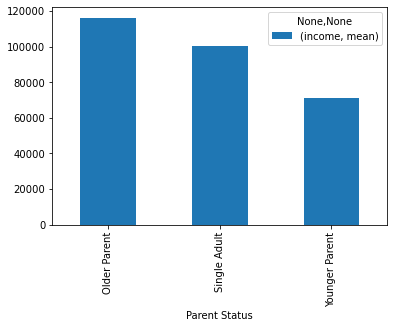

In [45]:
parent_income = df.groupby('Parent Status').agg({'income': ['mean']}).plot.bar()

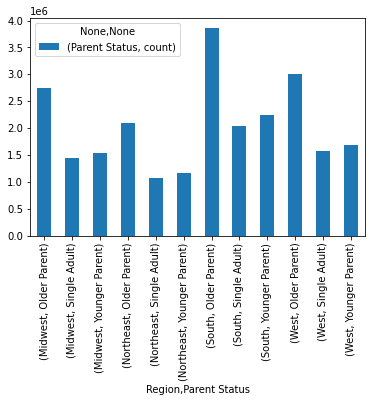

In [46]:
region_parent = df.groupby(['Region','Parent Status']).agg({'Parent Status': ['count']}).plot.bar()

In [47]:
parent_status.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data','parent_status.png'))

In [48]:
region_parent.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data','region_parent.png'))

In [49]:
parent_income.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data','parent_income.png'))

In [50]:
income_level.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data','income_level.png'))

<AxesSubplot:xlabel='department_id'>

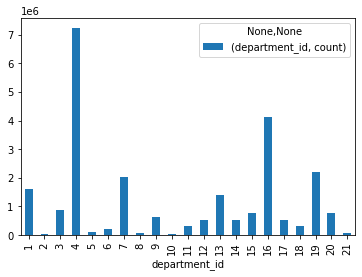

In [51]:
df.groupby(['department_id',]).agg({'department_id': ['count']}).plot.bar()

In [52]:
df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,STATE,Age,date_joined,Number_of_dependants,fam_status,income,Region,Activity,Parent Status,Income Level
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
5,5,3367565,1,prior,6,2,7,19.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
6,6,550135,1,prior,7,1,9,20.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
7,7,3108588,1,prior,8,1,14,14.0,196,2,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
8,8,2295261,1,prior,9,1,16,0.0,196,4,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Younger Parent,Middle Income
